#STUTERN KLUSTERTHON

##Precision Farmng for Best Product Results with Data

###Model Development

In [ ]:
# Importing libraries
import requests
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Crop_Data.csv')

**EXPLORATORY DATA ANALYSIS**

In [ ]:
# First 5 rows of the data
df.head()

,temperature,humidity,ph,water availability,season,label,Country,harvest season
0,20.879744,82.002744,6.502985,202.935536,rainy,rice,Nigeria,spring
1,21.770462,80.319644,7.038096,226.655537,rainy,rice,Nigeria,winter
2,23.004459,82.320763,7.840207,263.964248,rainy,rice,Nigeria,rainy
3,26.491096,80.158363,6.980401,242.864034,rainy,rice,Nigeria,rainy
4,20.130175,81.604873,7.628473,262.717340,rainy,rice,Nigeria,spring


In [ ]:
# Last five rows of our data
df.tail()

,temperature,humidity,ph,water availability,season,label,Country,harvest season
1395,23.874845,86.792613,6.718725,177.514731,rainy,jute,South Africa,winter
1396,23.928879,88.071123,6.880205,154.660874,rainy,jute,South Africa,winter
1397,24.814412,81.686889,6.861069,190.788639,rainy,jute,Nigeria,summer
1398,24.447439,82.286484,6.769346,190.968489,rainy,jute,Nigeria,summer
1399,26.574217,73.819949,7.261581,159.322307,rainy,jute,South Africa,summer


In [ ]:

# Total size of our data columns * rows
df.size

11200

In [ ]:
#Checking for any null values and the datatype of our columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         1400 non-null   float64
 1   humidity            1400 non-null   float64
 2   ph                  1400 non-null   float64
 3   water availability  1400 non-null   float64
 4   season              1400 non-null   object 
 5   label               1400 non-null   object 
 6   Country             1400 non-null   object 
 7   harvest season      1400 non-null   object 
dtypes: float64(4), object(4)
memory usage: 87.6+ KB


In [ ]:
df.shape

(1400, 8)

In [ ]:
df.columns

Index(['temperature', 'humidity', 'ph', 'water availability', 'season',
       'label', 'Country', 'harvest season'],
      dtype='object')

In [ ]:
# Renaming coluns with spaces in their labels
df.rename(columns = {'water availability':'water_availability','harvest season':'harvest_season'}, inplace = True)

In [ ]:
df.columns

Index(['temperature', 'humidity', 'ph', 'water_availability', 'season',
       'label', 'Country', 'harvest_season'],
      dtype='object')

In [ ]:
df.describe()

,temperature,humidity,ph,water_availability
count,1400.000000,1400.000000,1400.000000,1400.000000
mean,24.971621,64.611062,6.565246,91.784651
std,4.081622,22.753785,0.835101,58.682258
min,15.330426,14.258040,3.504752,20.211267
25%,22.178239,56.824217,6.068795,51.546542
50%,25.140245,68.288321,6.524478,72.379183
75%,27.963227,82.710409,7.042343,107.428334
max,36.977944,94.962187,9.935091,298.560117


In [ ]:
# Checking our data types
df.dtypes

temperature           float64
humidity              float64
ph                    float64
water_availability    float64
season                 object
label                  object
Country                object
harvest_season         object
dtype: object

In [ ]:
df.groupby(['season','Country'])['water_availability'].mean()

season  Country     
rainy   Kenya           134.806264
        Nigeria         119.994300
        South Africa    127.512090
        Sudan            99.011728
spring  Kenya            99.844908
        Nigeria         109.712343
        South Africa    102.687906
        Sudan            94.522681
summer  Kenya            45.897108
        Nigeria          42.049818
        South Africa     41.368544
        Sudan            43.263113
winter  Kenya            76.077547
        Nigeria          77.735466
        South Africa     79.577142
        Sudan            80.979511
Name: water_availability, dtype: float64

In [78]:
# The model would only accept float data type and not string, so we need to encode the string datatype to float numbers
season_mapping = {'rainy': 1.0, 'spring': 2.0, 'summer':3.0, 'winter':4.0}
country_mapping = {'Kenya': 0.1, 'Nigeria':0.2 , 'South Africa':0.3,'Sudan':0.4}

label_mapping = {'rice':1.0, 'maize':2.0, 'chickpea':3.0, 'kidneybeans':4.0, 'pigeonpeas':5.0,
       'mothbeans':6.0, 'mungbean':7.0, 'blackgram':8.0, 'lentil':9.0, 'watermelon':10.0,
       'muskmelon':11.0, 'cotton':12.0, 'jute':13.0}
encoded_df= df.replace({'Country':country_mapping,'harvest_season': season_mapping, 'label': label_mapping})

<Axes: >

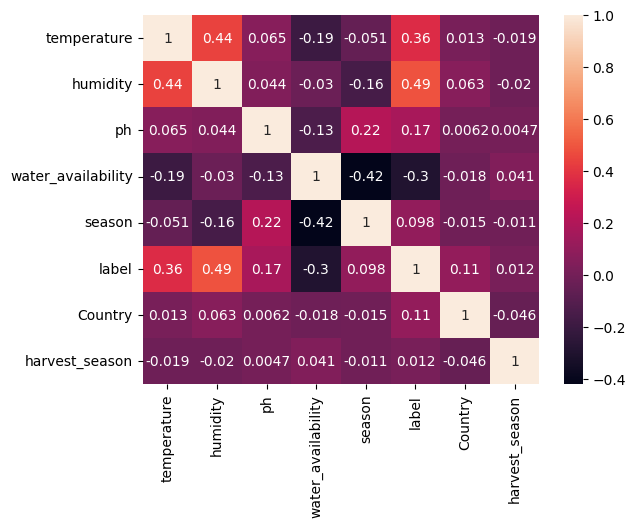

In [80]:
# Our target variable would be the "season" which our model will be predicting
# So we would check for correlation between the features and target variable
season_mapping = {'rainy': 1.0, 'spring': 2.0, 'summer':3.0, 'winter':4.0}
corr_df= encoded_df.replace({'season': season_mapping})
sns.heatmap(corr_df.corr(),annot=True)

In [ ]:
df.groupby(['season','Country','label'])['water_availability'].mean()

season  Country       label      
rainy   Kenya         jute           172.767702
                      lentil          47.662876
                      maize           85.130326
                      mungbean        56.786181
                      pigeonpeas     145.983192
                      rice           237.148488
        Nigeria       jute           177.287943
                      lentil          45.384485
                      maize           82.037780
                      mungbean        47.616815
                      pigeonpeas     147.775167
                      rice           237.484564
        South Africa  jute           173.249384
                      lentil          46.262756
                      maize           87.036107
                      mungbean        48.136631
                      pigeonpeas     152.338576
                      rice           235.404651
        Sudan         jute           172.061178
                      lentil          43.467640
      

In [81]:
# Country and Harvest_season are not strongly correlated to season, so we would be dropping these features
final_df = encoded_df.drop(['Country','harvest_season'], axis=1)

In [83]:
final_df.head()

,temperature,humidity,ph,water_availability,season,label
0,20.879744,82.002744,6.502985,202.935536,rainy,1.0
1,21.770462,80.319644,7.038096,226.655537,rainy,1.0
2,23.004459,82.320763,7.840207,263.964248,rainy,1.0
3,26.491096,80.158363,6.980401,242.864034,rainy,1.0
4,20.130175,81.604873,7.628473,262.717340,rainy,1.0


### Seperating features and target label

In [84]:
def split(df):
# Separating the data into features and variables
    X = df.drop(['season'], axis=1)
    y = df['season']
    return X,y

In [85]:
X, y = split(final_df)

In [88]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [89]:
# # Splitting into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = \
    train_test_split(X,y,test_size=0.2,random_state=6)


# Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train,y_train)

predicted_values = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  93.21428571428572
              precision    recall  f1-score   support

       rainy       1.00      0.85      0.92       131
      spring       1.00      1.00      1.00        15
      summer       1.00      1.00      1.00        54
      winter       0.81      1.00      0.89        80

    accuracy                           0.93       280
   macro avg       0.95      0.96      0.95       280
weighted avg       0.95      0.93      0.93       280



In [91]:
from sklearn.model_selection import cross_val_score

In [93]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, X, y,cv=5)
score

array([0.91071429, 0.65357143, 0.83928571, 0.77857143, 0.64285714])

### Saving trained Decision Tree model

In [94]:
import pickle
# Dump the trained DecisionTree classifier with Pickle
DT_pkl_filename = 'Models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [95]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,y_train)

predicted_values = NaiveBayes.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes's Accuracy is:  0.7464285714285714
              precision    recall  f1-score   support

       rainy       0.89      0.65      0.75       131
      spring       1.00      1.00      1.00        15
      summer       0.54      0.91      0.68        54
      winter       0.77      0.75      0.76        80

    accuracy                           0.75       280
   macro avg       0.80      0.83      0.80       280
weighted avg       0.79      0.75      0.75       280



In [96]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,X,y,cv=5)
score

array([0.77142857, 0.59642857, 0.60357143, 0.47857143, 0.85357143])

### Saving trained Guassian Naive Bayes model

In [97]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'Models/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [98]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
# transform testing dataabs
X_test_norm = norm.transform(X_test)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,y_train)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

SVM's Accuracy is:  0.9214285714285714
              precision    recall  f1-score   support

       rainy       0.93      0.91      0.92       131
      spring       1.00      1.00      1.00        15
      summer       1.00      0.96      0.98        54
      winter       0.85      0.90      0.87        80

    accuracy                           0.92       280
   macro avg       0.94      0.94      0.94       280
weighted avg       0.92      0.92      0.92       280



In [99]:
# Cross validation score (SVM)
score = cross_val_score(SVM,X,y,cv=5)
score

array([0.43214286, 0.46785714, 0.6       , 0.41071429, 0.86428571])

#Saving trained SVM model

In [100]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'Models/SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(X_train,y_train)

predicted_values = LogReg.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Logistic Regression's Accuracy is:  0.6821428571428572
              precision    recall  f1-score   support

       rainy       0.74      0.68      0.71       131
      spring       0.67      0.80      0.73        15
      summer       0.54      0.74      0.62        54
      winter       0.74      0.62      0.68        80

    accuracy                           0.68       280
   macro avg       0.67      0.71      0.68       280
weighted avg       0.70      0.68      0.68       280



In [102]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,X,y,cv=5)
score

array([0.54285714, 0.52142857, 0.44642857, 0.35357143, 0.575     ])

### Saving trained Logistic Regression model

In [103]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'Models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,y_train)

predicted_values = RF.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

RF's Accuracy is:  0.9035714285714286
              precision    recall  f1-score   support

       rainy       0.93      0.86      0.89       131
      spring       1.00      1.00      1.00        15
      summer       1.00      1.00      1.00        54
      winter       0.80      0.89      0.84        80

    accuracy                           0.90       280
   macro avg       0.93      0.94      0.93       280
weighted avg       0.91      0.90      0.90       280



In [105]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,X,y,cv=5)
score

array([0.92142857, 0.71071429, 0.85714286, 0.78571429, 0.76785714])

### Saving trained Random Forest model

In [106]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'Models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

## Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

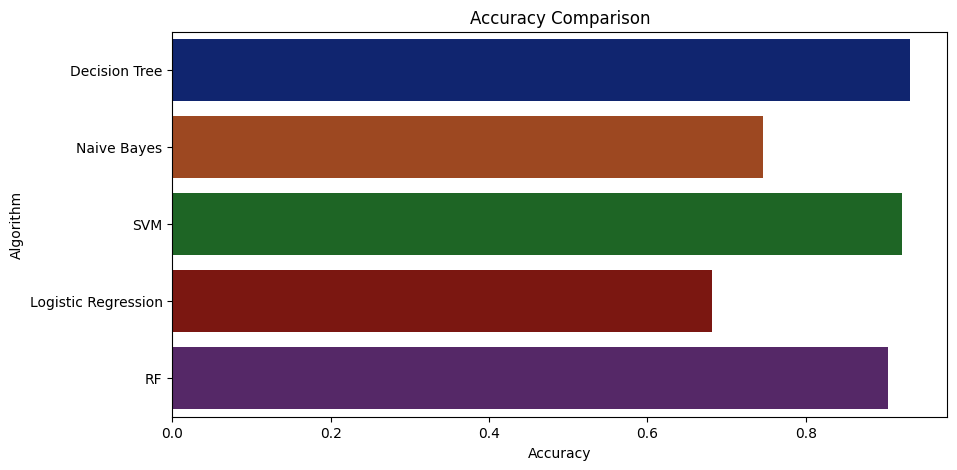

In [107]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [108]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9321428571428572
Naive Bayes --> 0.7464285714285714
SVM --> 0.9214285714285714
Logistic Regression --> 0.6821428571428572
RF --> 0.9035714285714286


## Making a prediction

In [120]:
final_df.head(50)

,temperature,humidity,ph,water_availability,season,label
0,20.879744,82.002744,6.502985,202.935536,rainy,1.0
1,21.770462,80.319644,7.038096,226.655537,rainy,1.0
2,23.004459,82.320763,7.840207,263.964248,rainy,1.0
3,26.491096,80.158363,6.980401,242.864034,rainy,1.0
4,20.130175,81.604873,7.628473,262.717340,rainy,1.0
5,23.058049,83.370118,7.073454,251.055000,rainy,1.0
6,22.708838,82.639414,5.700806,271.324860,rainy,1.0
7,20.277744,82.894086,5.718627,241.974195,rainy,1.0
8,24.515881,83.535216,6.685346,230.446236,rainy,1.0
9,23.223974,83.033227,6.336254,221.209196,rainy,1.0


In [140]:
data = np.array([[31.15,56, 6.005242945, 132.55919573, 5.0]])
prediction = RF.predict(data)
print(prediction)


['rainy']


In [141]:
data = np.array([[31.15,56, 6.005242945, 132.55919573, 9.0]])
prediction = DecisionTree.predict(data)
print(prediction)


['rainy']


In [135]:
def weather_fetch(city_name):
    """
    Fetch and returns the temperature and humidity of a city
    :params: city_name
    :return: temperature, humidity
    """
    api_key = "9d7cde1f6d07ec55650544be1631307e"
    base_url = "http://api.openweathermap.org/data/2.5/weather?"

    complete_url = base_url + "appid=" + api_key + "&q=" + city_name
    response = requests.get(complete_url)
    x = response.json()

    if x["cod"] != "404":
        y = x["main"]

        temperature = round((y["temp"] - 273.15), 2)
        humidity = y["humidity"]
        return temperature, humidity, x
    else:
        return None

In [136]:
weather_fetch('Port Harcourt')

(31.1,
 56,
 {'coord': {'lon': 7.0134, 'lat': 4.7774},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04d'}],
  'base': 'stations',
  'main': {'temp': 304.25,
   'feels_like': 307.23,
   'temp_min': 304.25,
   'temp_max': 304.25,
   'pressure': 1009,
   'humidity': 56,
   'sea_level': 1009,
   'grnd_level': 1007},
  'visibility': 10000,
  'wind': {'speed': 2.56, 'deg': 147, 'gust': 2.24},
  'clouds': {'all': 100},
  'dt': 1700826939,
  'sys': {'type': 1,
   'id': 1170,
   'country': 'NG',
   'sunrise': 1700803338,
   'sunset': 1700846106},
  'timezone': 3600,
  'id': 2324774,
  'name': 'Port Harcourt',
  'cod': 200})